# Data: Ad Sales Data
# Use Case: Revenue Prediction
# Model: Regression Models

Code link: https://www.kaggle.com/code/akshaysunil07/ad-tech-revenue-regression/notebook 

# Installing packages section

In [ ]:
# Installing packages set for without init script
!pip install --upgrade pip

!pip install "snowflake-connector-python[pandas]" "snowflake-snowpark-python[pandas]" snowflake-snowpark-python==1.9.0 fosforio fosforml numpy pandas matplotlib scikit-learn xgboost python-dateutil 
#!pip install tqdm 
!pip install --upgrade --q snowflake-snowpark-python==1.9.0
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15
!pip install seaborn

# Restart and clear outputs

# Importing packages

In [1]:
from fosforio import snowflake
from fosforml import *
from fosforml.constants import MLModelFlavours
from fosforio import get_dataframe

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns

import warnings; warnings.simplefilter('ignore')
from joblib import dump, load
import requests
#from tqdm import tqdm
import time
import calendar
import configparser
from dateutil.relativedelta import relativedelta
import datetime

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from time import sleep
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from dateutil.easter import easter
from scipy.optimize import minimize_scalar
from scipy.optimize import curve_fit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


/tmp/pip_packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Matplotlib created a temporary cache directory at /tmp/matplotlib-z42gnd6f because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Importing data from snowflake

In [2]:
#from fosforio import snowflake
#from fosforio import get_dataframe
snowflake.get_connection(connection_name="ME_AD_SALES_CXN")
#df = get_dataframe("AD_SALES_IMP")
df_all = get_dataframe("AD_TECH_INPUT")

Connection object created: <snowflake.connector.connection.SnowflakeConnection object at 0x7f4ce845f850>
Please close the connection after use!
Reading dataframe from snowflake native connector


In [3]:
df = get_dataframe("AD_SALES_IMP")

Reading dataframe from snowflake native connector


In [4]:
df_copy = df_all.copy()

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AD_DATE                  567291 non-null  object 
 1   SITE_ID                  567291 non-null  int16  
 2   AD_TYPE_ID               567291 non-null  int8   
 3   GEO_ID                   567291 non-null  int16  
 4   DEVICE_CATEGORY_ID       567291 non-null  int8   
 5   ADVERTISER_ID            567291 non-null  int16  
 6   ORDER_ID                 567291 non-null  int16  
 7   LINE_ITEM_TYPE_ID        567291 non-null  int8   
 8   OS_ID                    567291 non-null  int8   
 9   MONETIZATION_CHANNEL_ID  567291 non-null  int8   
 10  AD_UNIT_ID               567291 non-null  int16  
 11  TOTAL_IMPRESSIONS        567291 non-null  int16  
 12  TOTAL_REVENUE            567291 non-null  float64
 13  VIEWABLE_IMPRESSIONS     567291 non-null  int16  
 14  MEAS

In [ ]:
#df.columns = df.columns.str.lower()
#df_all.columns = df_all.columns.str.lower()
#df.info()

In [6]:
df_all.columns

Index(['AD_DATE', 'SITE_ID', 'AD_TYPE_ID', 'GEO_ID', 'DEVICE_CATEGORY_ID',
       'ADVERTISER_ID', 'ORDER_ID', 'LINE_ITEM_TYPE_ID', 'OS_ID',
       'MONETIZATION_CHANNEL_ID', 'AD_UNIT_ID', 'TOTAL_IMPRESSIONS',
       'TOTAL_REVENUE', 'VIEWABLE_IMPRESSIONS', 'MEASURABLE_IMPRESSIONS',
       'REVENUE_SHARE_PERCENT', 'AD_TYPE', 'AD_FORMAT', 'AD_MEDIA_TYPE',
       'DEVICE_TYPE', 'CITY', 'CITY_CODE', 'POPULATION', 'CITY_LAT',
       'CITY_LON', 'LINE_ITEM_GROUP', 'LINE_ITEM_TYPE', 'MONETIZATION_CHANNEL',
       'OS_TYPE'],
      dtype='object')

# Exploratory data analysis

In [7]:
cat_col=['AD_DATE', 'SITE_ID','ADVERTISER_ID', 'ORDER_ID','AD_TYPE', 'AD_FORMAT', 'AD_MEDIA_TYPE',
         'DEVICE_TYPE', 'CITY', 'LINE_ITEM_GROUP', 'LINE_ITEM_TYPE', 'MONETIZATION_CHANNEL','OS_TYPE']
scat_col = ['SITE_ID','AD_TYPE', 'AD_FORMAT', 'DEVICE_TYPE', 'ADVERTISER_ID',
            'LINE_ITEM_GROUP', 'LINE_ITEM_TYPE', 'OS_TYPE','MONETIZATION_CHANNEL']

num_col=list(df_all.select_dtypes(np.number).columns)

IndexError: list index out of range

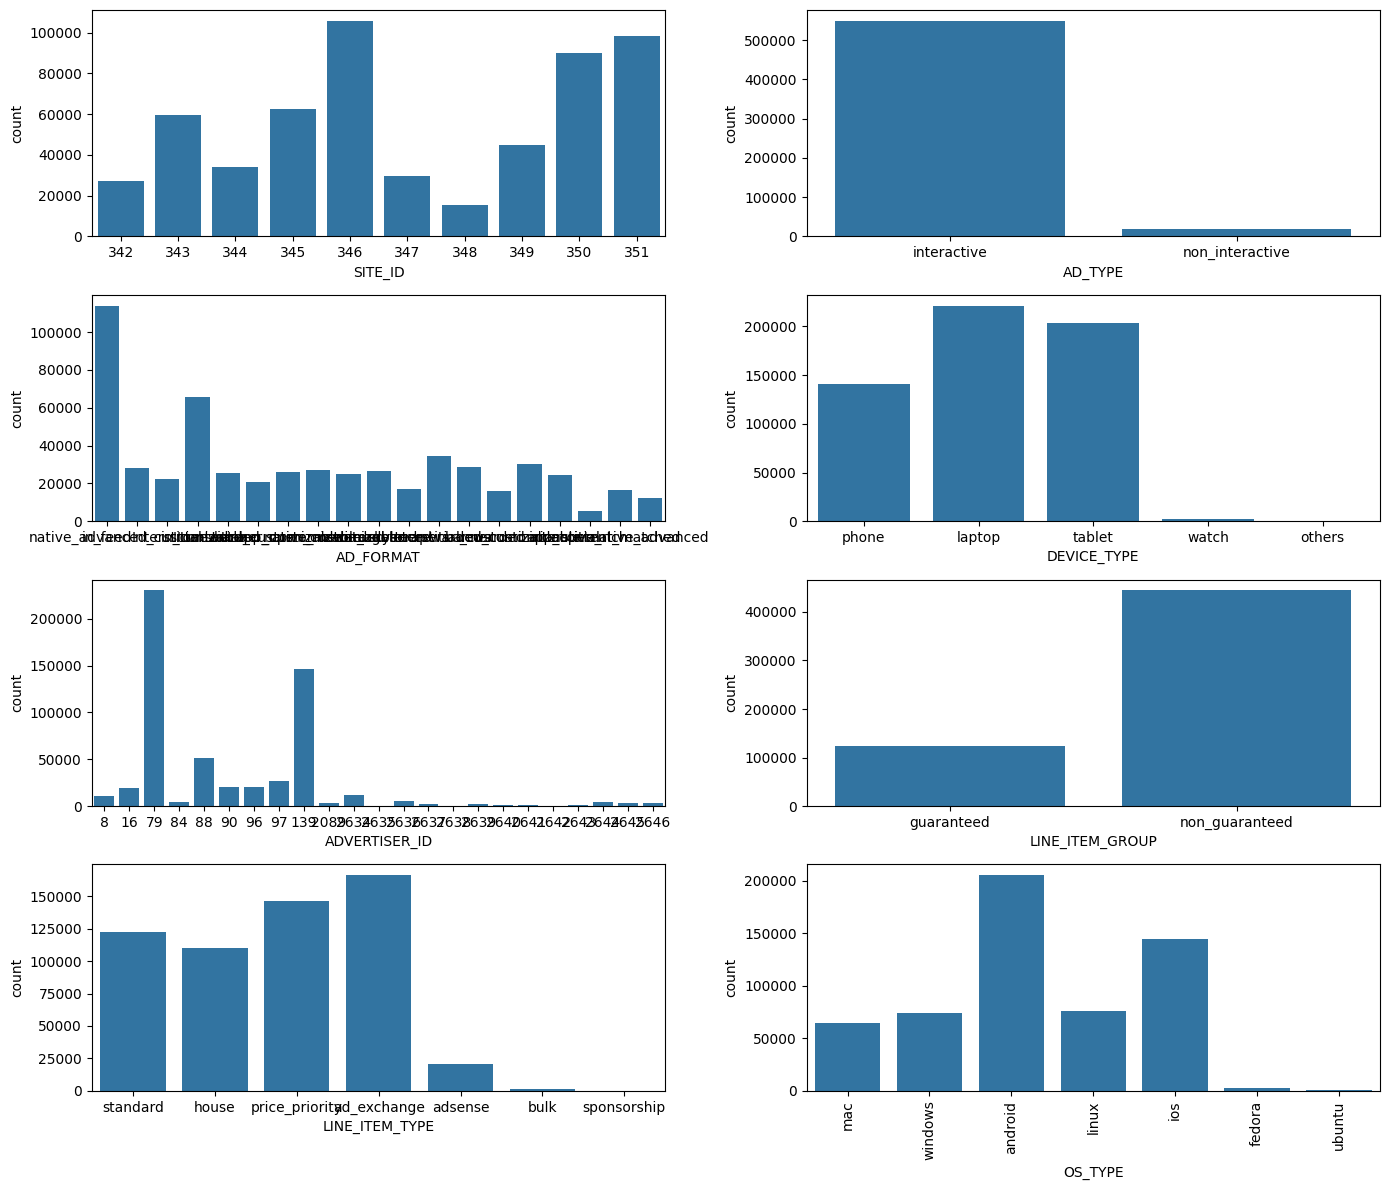

In [8]:
fig, ax = plt.subplots(4,2, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i,col in enumerate(scat_col):
    sns.countplot(data=df_all,x=col,ax=axes_[i])
    if col=='ADVERTISER_ID':
        plt.xticks(rotation=90)
    plt.tight_layout()

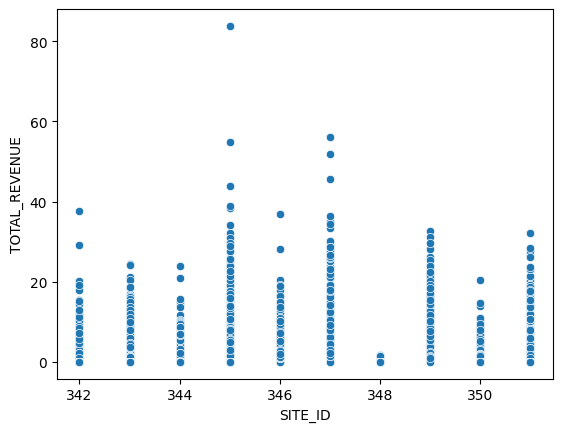

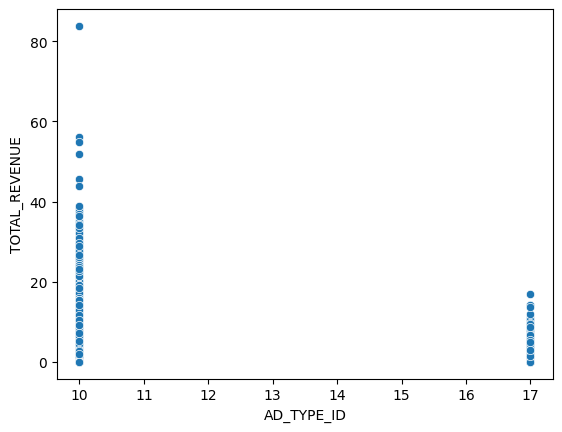

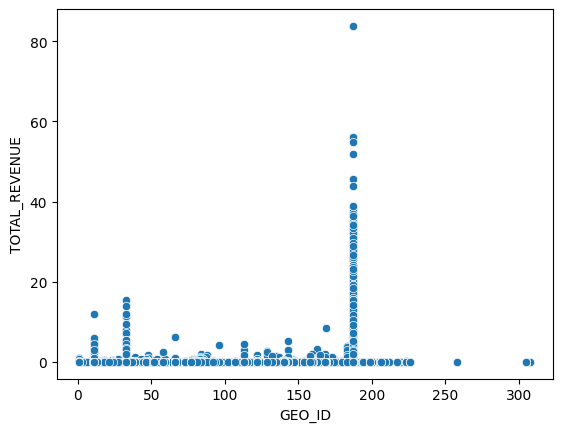

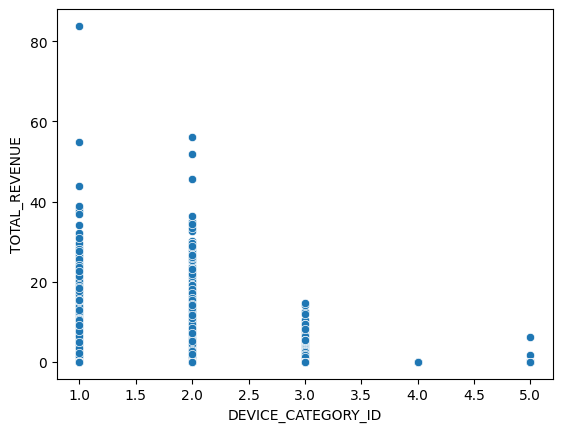

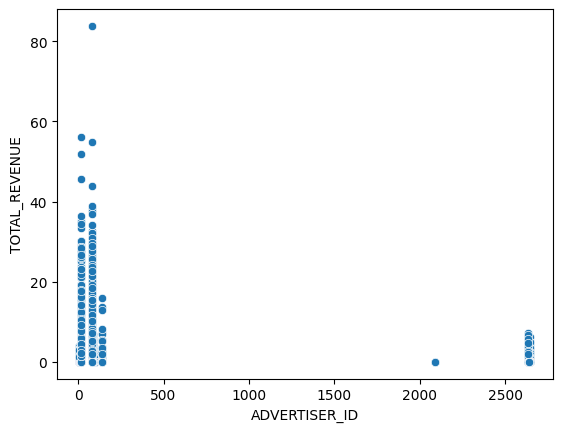

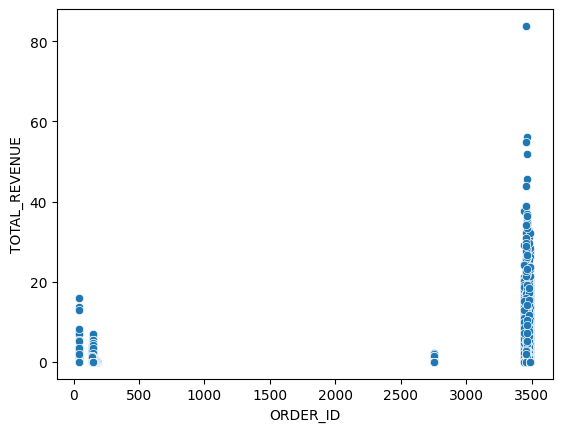

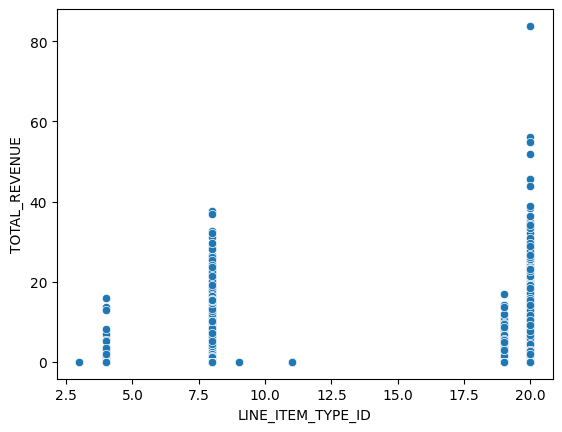

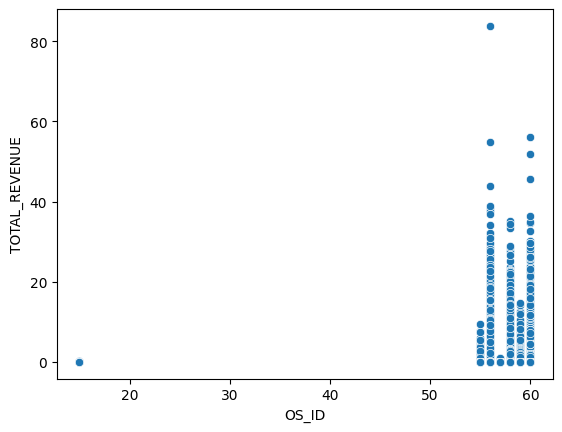

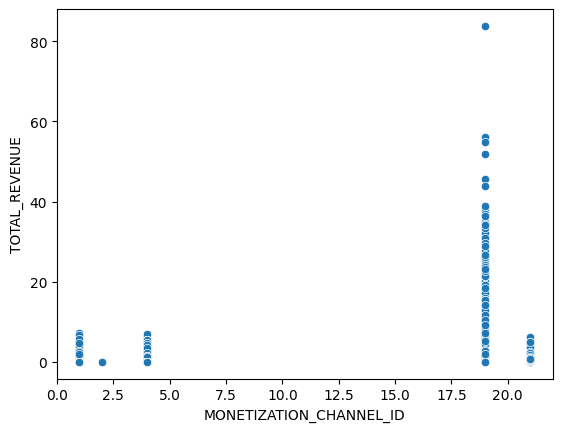

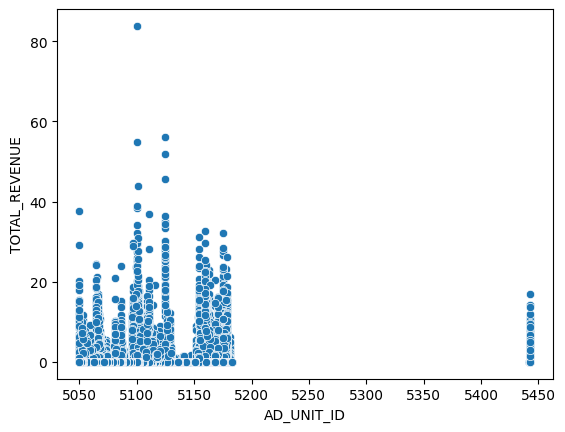

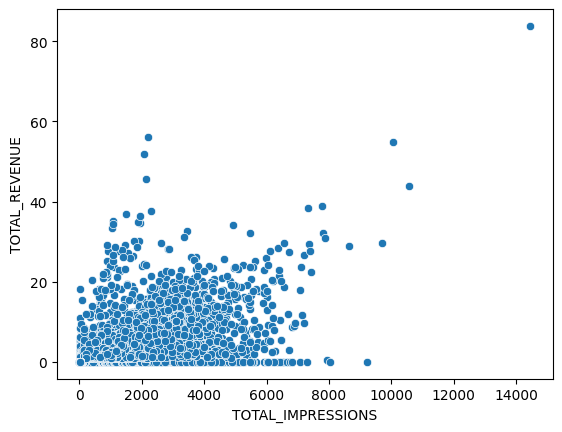

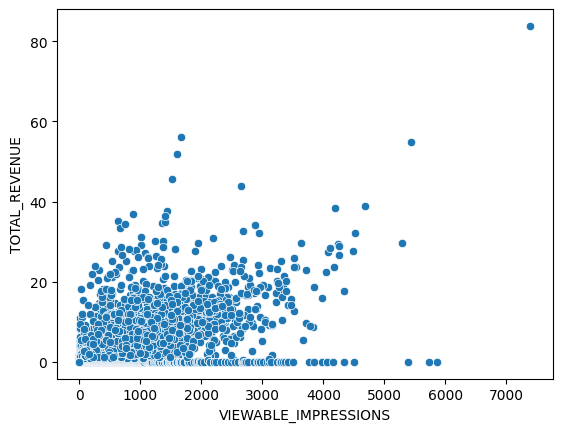

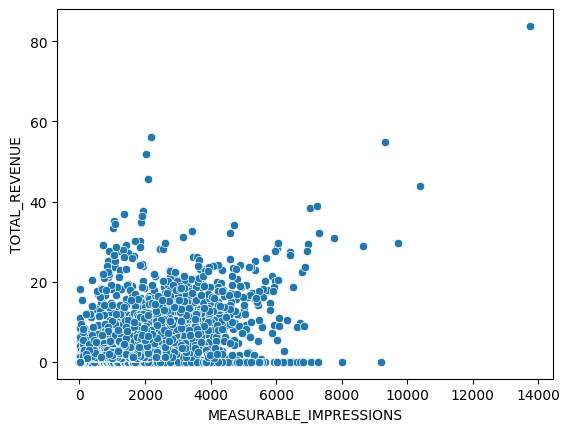

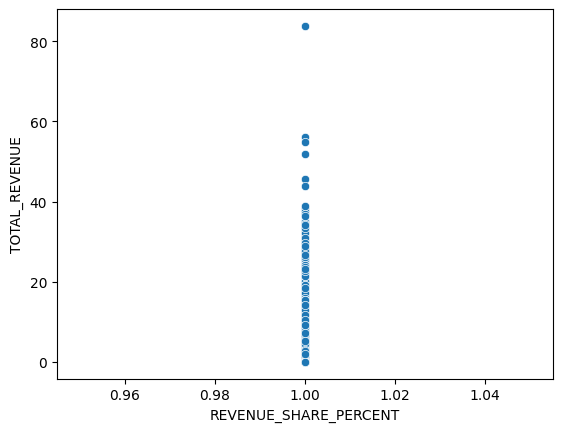

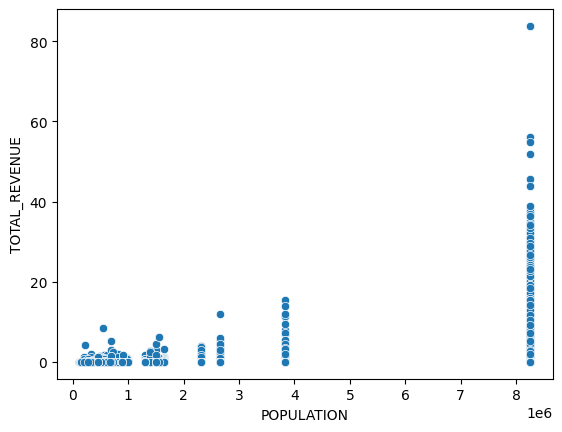

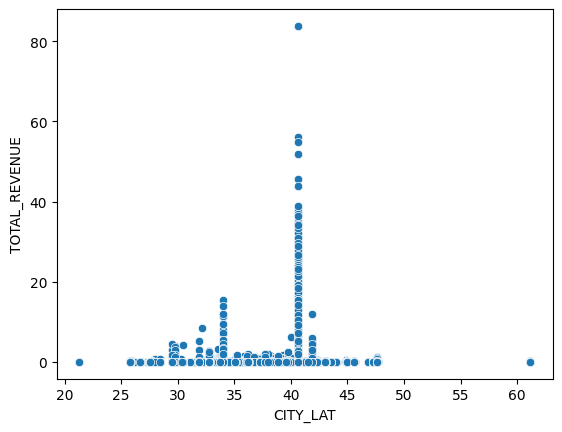

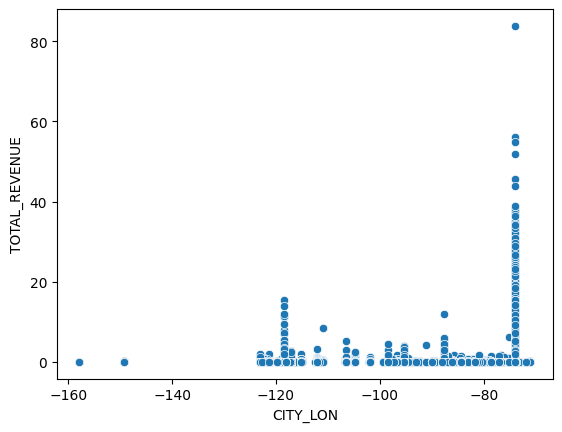

In [11]:
for i in num_col:
    if i!='TOTAL_REVENUE':
        sns.scatterplot(data=df_all,x=i,y='TOTAL_REVENUE')
        plt.show()

In [ ]:
#df.max()

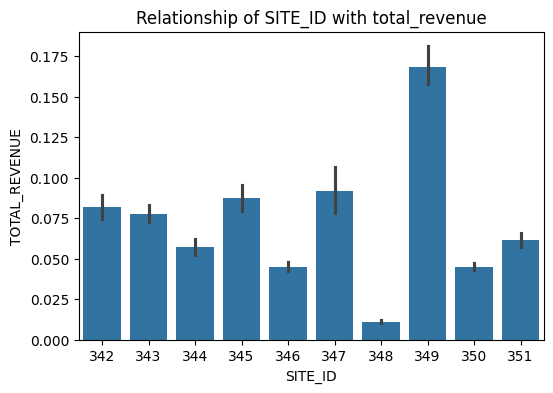

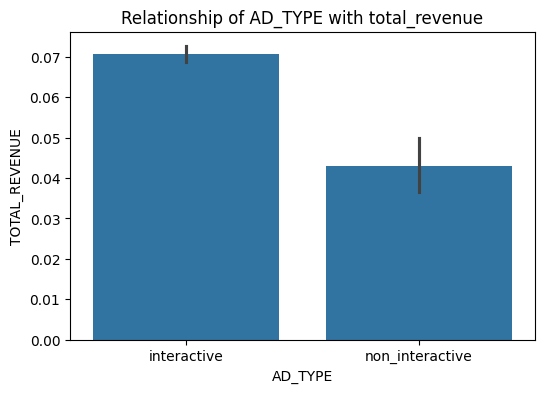

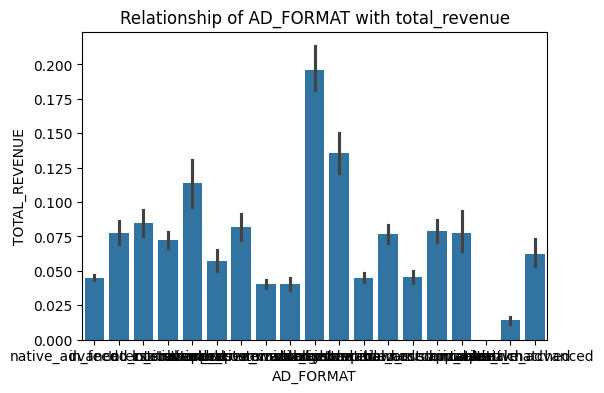

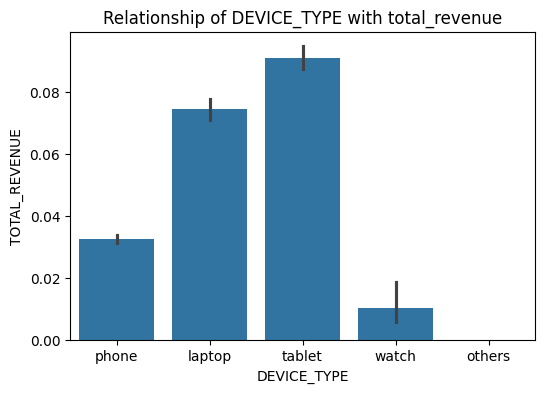

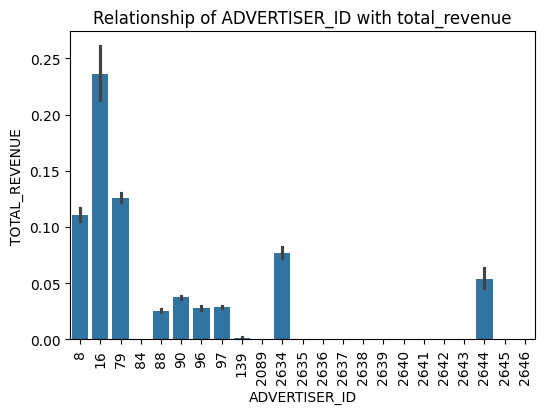

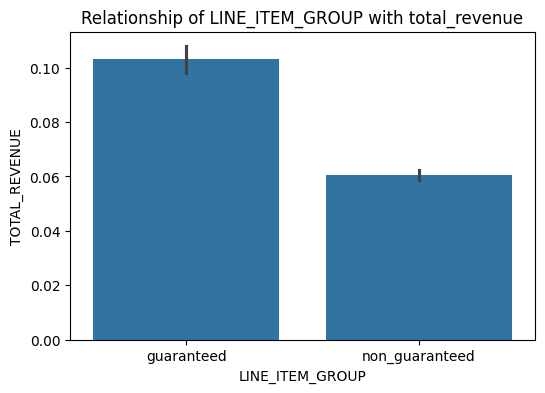

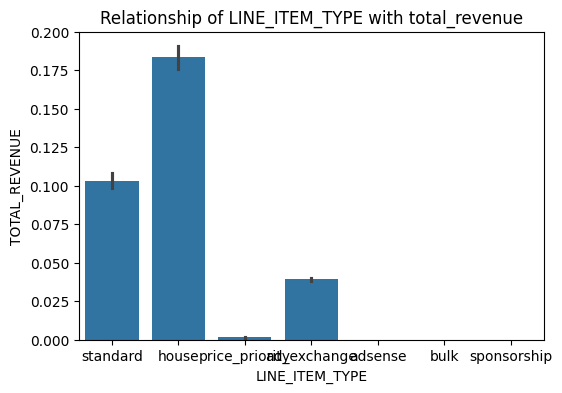

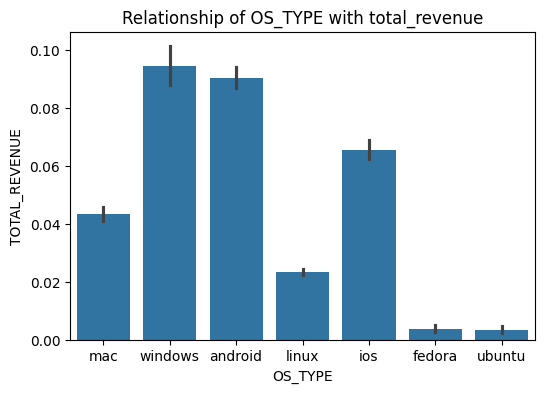

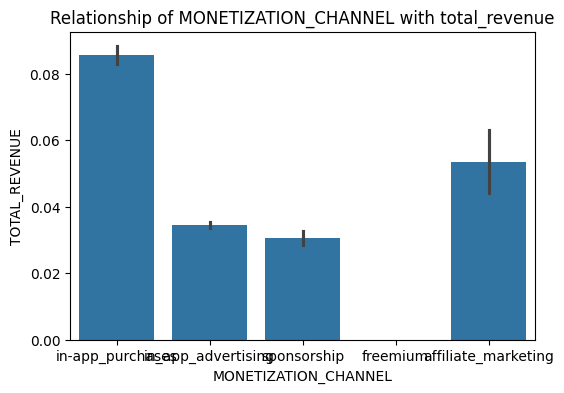

In [12]:
for col in (scat_col):
    title='Relationship of '+col+' with total_revenue'
    plt.figure(figsize=(6,4))
    sns.barplot(y=df_all['TOTAL_REVENUE'],x=df_all[col])
    if col=='ADVERTISER_ID':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

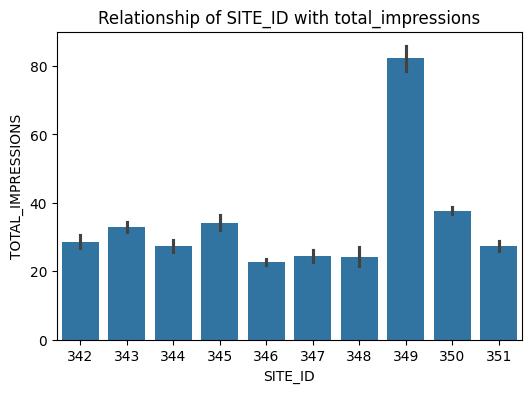

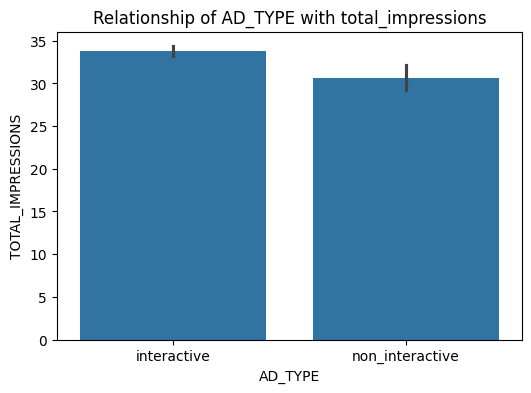

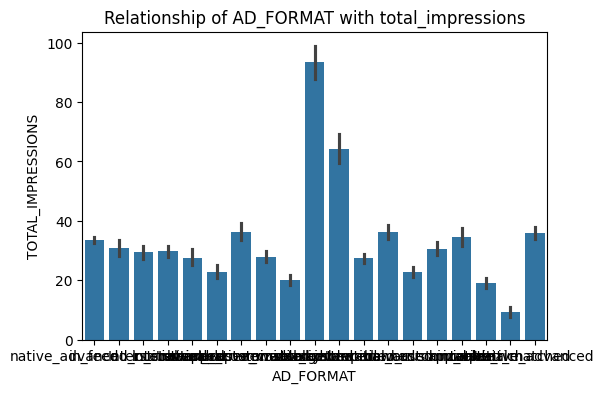

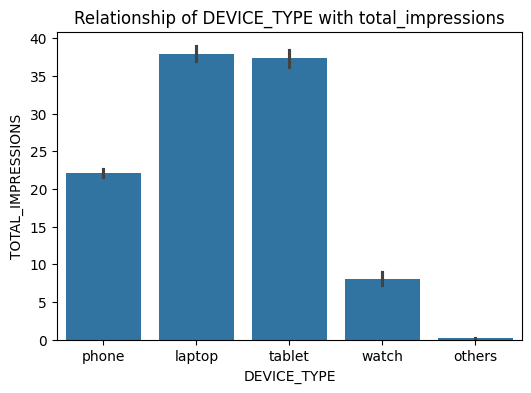

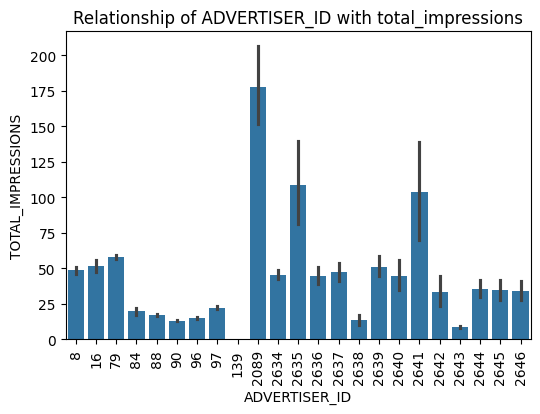

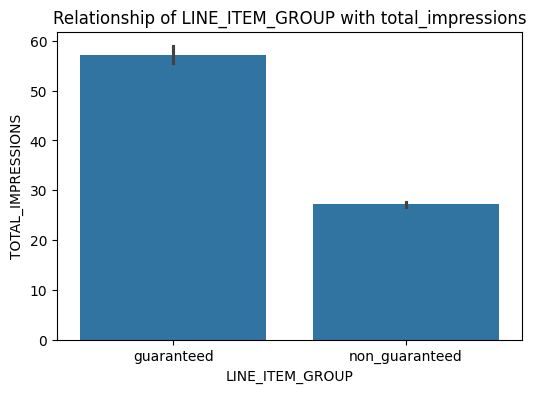

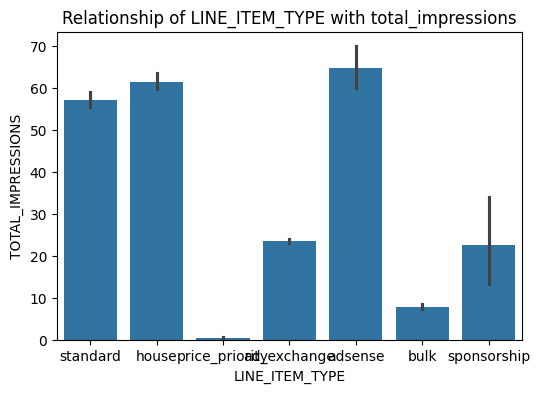

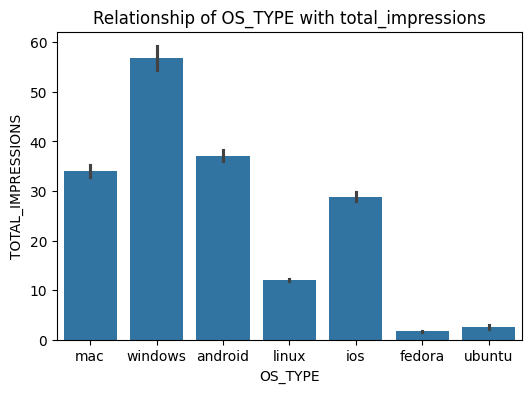

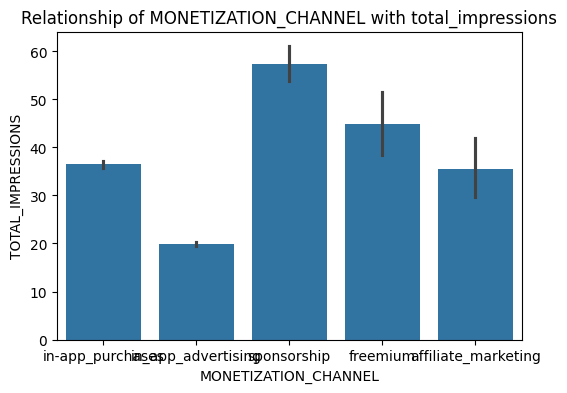

In [13]:
for col in (scat_col):
    title='Relationship of '+ col +' with total_impressions'
    plt.figure(figsize=(6,4))
    sns.barplot(y=df_all['TOTAL_IMPRESSIONS'],x=df_all[col],)
    if col=='ADVERTISER_ID':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

In [14]:
for i in cat_col:
    df_all[i]=df_all[i].astype('object')

In [15]:
df_all.drop(['AD_UNIT_ID','REVENUE_SHARE_PERCENT','AD_TYPE_ID','SITE_ID','ADVERTISER_ID',
        'AD_DATE','GEO_ID','ORDER_ID', 'AD_TYPE', 'AD_FORMAT', 'AD_MEDIA_TYPE', 'LINE_ITEM_GROUP',
            'CITY', 'CITY_CODE', 'DEVICE_CATEGORY_ID', 'LINE_ITEM_TYPE_ID', 'OS_ID',
       'MONETIZATION_CHANNEL_ID','POPULATION', 'CITY_LAT', 'CITY_LON'],axis=1,inplace=True)

In [16]:
df_all.columns

Index(['TOTAL_IMPRESSIONS', 'TOTAL_REVENUE', 'VIEWABLE_IMPRESSIONS',
       'MEASURABLE_IMPRESSIONS', 'DEVICE_TYPE', 'LINE_ITEM_TYPE',
       'MONETIZATION_CHANNEL', 'OS_TYPE'],
      dtype='object')

In [17]:
df_all.select_dtypes(object)

,DEVICE_TYPE,LINE_ITEM_TYPE,MONETIZATION_CHANNEL,OS_TYPE
0,phone,standard,in-app_purchases,mac
1,laptop,standard,in-app_purchases,windows
2,tablet,standard,in-app_purchases,android
3,laptop,standard,in-app_purchases,windows
4,tablet,standard,in-app_purchases,android
...,...,...,...,...
567286,tablet,standard,in-app_purchases,android
567287,laptop,standard,in-app_purchases,ios
567288,phone,standard,in-app_purchases,mac
567289,laptop,standard,in-app_purchases,windows


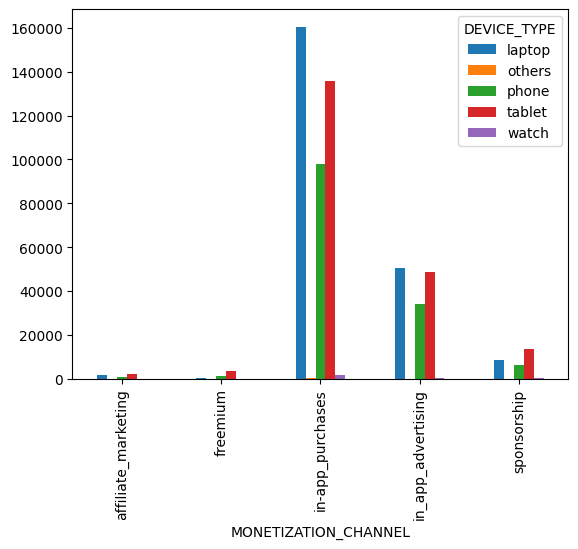

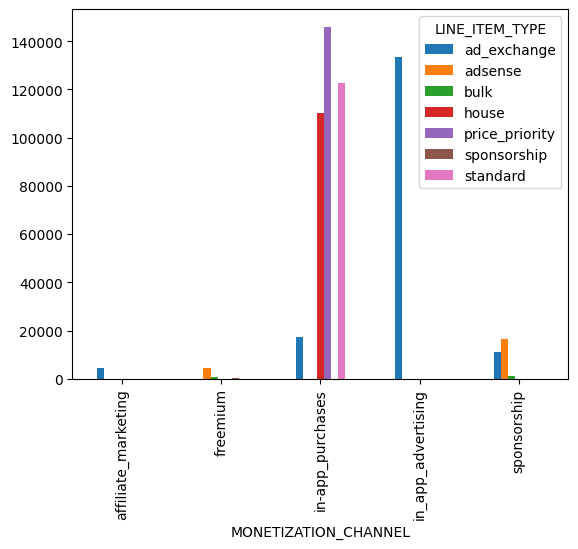

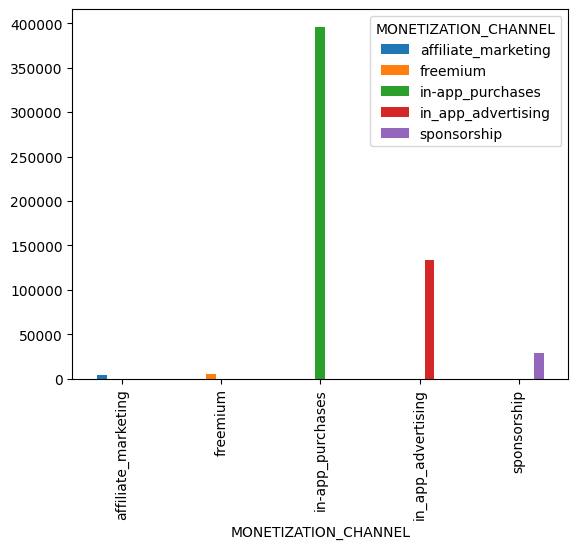

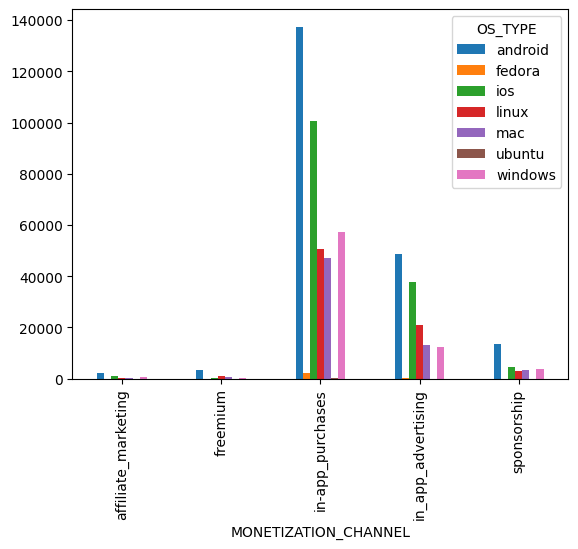

In [18]:
for i in df_all.select_dtypes(object).columns:
    pd.crosstab(df_all['MONETIZATION_CHANNEL'],df_all[i]).plot(kind='bar')
    plt.show()

# Predictive Modelling

In [19]:
import joblib

In [20]:
Xd = df_all.drop('TOTAL_REVENUE',axis=1)
y = df_all['TOTAL_REVENUE']

In [21]:
Xd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   TOTAL_IMPRESSIONS       567291 non-null  int16 
 1   VIEWABLE_IMPRESSIONS    567291 non-null  int16 
 2   MEASURABLE_IMPRESSIONS  567291 non-null  int16 
 3   DEVICE_TYPE             567291 non-null  object
 4   LINE_ITEM_TYPE          567291 non-null  object
 5   MONETIZATION_CHANNEL    567291 non-null  object
 6   OS_TYPE                 567291 non-null  object
dtypes: int16(3), object(4)
memory usage: 20.6+ MB


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xd,y,test_size=0.2,random_state=4)

In [23]:
pc_col = ['TOTAL_IMPRESSIONS', 'VIEWABLE_IMPRESSIONS', 'MEASURABLE_IMPRESSIONS']

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=2))
        ]), pc_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['DEVICE_TYPE', 'LINE_ITEM_TYPE', 'OS_TYPE',
       'MONETIZATION_CHANNEL'])
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [25]:
models = [

    {
        'name': 'RandomForestRegressor',
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [50],
        'regressor__max_depth': [10],
        'regressor__min_samples_split': [2],
        'regressor__min_samples_leaf': [1],
        'regressor__bootstrap': [True]
    },
]

In [26]:
best_estimators = []
for model_params in models:
    model_name = model_params.pop('name')  # Extract the model name
    grid_search = GridSearchCV(pipeline, model_params, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimator = grid_search.best_estimator_
    best_estimators.append(best_estimator)
    print(f"Training completed for model {model_name}")
    
    # Save the best model
    joblib.dump(best_estimator, f'best_model_{model_name}.pkl')
    print(f"Best model {model_name} saved to best_model_{model_name}.pkl")

Training completed for model RandomForestRegressor
Best model RandomForestRegressor saved to best_model_RandomForestRegressor.pkl


In [27]:
results = []
for estimator in best_estimators:
    y_pred_train = estimator.predict(X_train)
    y_pred_test = estimator.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    results.append({
        'model': estimator.named_steps['regressor'].__class__.__name__,
        'best_params': estimator.named_steps['regressor'].get_params(),
        'mse': mse,
        'r2': r2
    })

results_df = pd.DataFrame(results)
results_df

,model,best_params,mse,r2
0,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.127845,0.735659


In [28]:
df_all['PREDICTED_REVENUE'] = best_estimator.predict(Xd)
df_copy['PREDICTED_REVENUE'] = best_estimator.predict(Xd)

In [29]:
df_copy

,AD_DATE,SITE_ID,AD_TYPE_ID,GEO_ID,DEVICE_CATEGORY_ID,ADVERTISER_ID,ORDER_ID,LINE_ITEM_TYPE_ID,OS_ID,MONETIZATION_CHANNEL_ID,AD_UNIT_ID,TOTAL_IMPRESSIONS,TOTAL_REVENUE,VIEWABLE_IMPRESSIONS,MEASURABLE_IMPRESSIONS,REVENUE_SHARE_PERCENT,AD_TYPE,AD_FORMAT,AD_MEDIA_TYPE,DEVICE_TYPE,CITY,CITY_CODE,POPULATION,CITY_LAT,CITY_LON,LINE_ITEM_GROUP,LINE_ITEM_TYPE,MONETIZATION_CHANNEL,OS_TYPE,PREDICTED_REVENUE
0,2024-06-18,350,10,33,3,79,3485,8,59,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,phone,Los Angeles,CA,3820914,34.02,-118.41,guaranteed,standard,in-app_purchases,mac,0.000895
1,2024-06-18,350,10,33,2,79,3485,8,60,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,laptop,Los Angeles,CA,3820914,34.02,-118.41,guaranteed,standard,in-app_purchases,windows,0.000895
2,2024-06-18,350,10,27,1,79,3485,8,56,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,tablet,Orlando,FL,320742,28.41,-81.25,guaranteed,standard,in-app_purchases,android,0.000906
3,2024-06-18,350,10,24,2,79,3485,8,60,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,laptop,Jacksonville,FL,985843,30.34,-81.66,guaranteed,standard,in-app_purchases,windows,0.000895
4,2024-06-18,350,10,21,1,79,3485,8,56,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,tablet,Worcester,MA,207621,42.27,-71.81,guaranteed,standard,in-app_purchases,android,0.000906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567286,2024-06-18,350,10,84,1,79,3485,8,56,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,tablet,Las Vegas,NV,660929,36.23,-115.26,guaranteed,standard,in-app_purchases,android,0.000906
567287,2024-06-18,350,10,81,2,79,3485,8,58,19,5168,4,0.0,0,2,1,interactive,in_feed,survey,laptop,Atlanta,GA,510823,33.76,-84.42,guaranteed,standard,in-app_purchases,ios,0.000895
567288,2024-06-18,350,10,77,3,79,3485,8,59,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,phone,Long Beach,CA,449468,33.78,-118.17,guaranteed,standard,in-app_purchases,mac,0.000895
567289,2024-06-18,350,10,77,2,79,3485,8,60,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,laptop,Long Beach,CA,449468,33.78,-118.17,guaranteed,standard,in-app_purchases,windows,0.000895


In [30]:
#check

print(df_copy['PREDICTED_REVENUE'].sum())
print(df_copy['TOTAL_REVENUE'].sum())

39339.887646930605
39563.27339999999


# Pushing Model output to Snowflake

In [31]:
import os
from snowflake.snowpark.session import Session
user = os.getenv("user")
warehouse = os.getenv("warehouse")
schema= os.getenv("schema")
database = os.getenv("database")
role =  os.getenv("role")
account =  os.getenv("account")
password= os.getenv("password")

connection_params = dict(user=user, 
                         password=password, 
                         account=account, 
                         warehouse=warehouse, 
                         database=database,
                         schema=schema, 
                         role=role)

session = Session.builder.configs(connection_params).create()

session.sql('use warehouse {};'.format(warehouse)).collect()

session.sql('use database {};'.format(database)).collect()

session.sql('use schema {}.{};'.format(database, schema)).collect()

[Row(status='Statement executed successfully.')]

In [32]:
df_snowflake = session.createDataFrame(df_copy.values.tolist(),
        schema = df_copy.columns.tolist())

df_snowflake.write.mode("overwrite").save_as_table("ME_DB.ME_AD_SALES_SCHEMA.AD_TECH_OUTPUT")

In [33]:
df_copy

,AD_DATE,SITE_ID,AD_TYPE_ID,GEO_ID,DEVICE_CATEGORY_ID,ADVERTISER_ID,ORDER_ID,LINE_ITEM_TYPE_ID,OS_ID,MONETIZATION_CHANNEL_ID,AD_UNIT_ID,TOTAL_IMPRESSIONS,TOTAL_REVENUE,VIEWABLE_IMPRESSIONS,MEASURABLE_IMPRESSIONS,REVENUE_SHARE_PERCENT,AD_TYPE,AD_FORMAT,AD_MEDIA_TYPE,DEVICE_TYPE,CITY,CITY_CODE,POPULATION,CITY_LAT,CITY_LON,LINE_ITEM_GROUP,LINE_ITEM_TYPE,MONETIZATION_CHANNEL,OS_TYPE,PREDICTED_REVENUE
0,2024-06-18,350,10,33,3,79,3485,8,59,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,phone,Los Angeles,CA,3820914,34.02,-118.41,guaranteed,standard,in-app_purchases,mac,0.000895
1,2024-06-18,350,10,33,2,79,3485,8,60,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,laptop,Los Angeles,CA,3820914,34.02,-118.41,guaranteed,standard,in-app_purchases,windows,0.000895
2,2024-06-18,350,10,27,1,79,3485,8,56,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,tablet,Orlando,FL,320742,28.41,-81.25,guaranteed,standard,in-app_purchases,android,0.000906
3,2024-06-18,350,10,24,2,79,3485,8,60,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,laptop,Jacksonville,FL,985843,30.34,-81.66,guaranteed,standard,in-app_purchases,windows,0.000895
4,2024-06-18,350,10,21,1,79,3485,8,56,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,tablet,Worcester,MA,207621,42.27,-71.81,guaranteed,standard,in-app_purchases,android,0.000906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567286,2024-06-18,350,10,84,1,79,3485,8,56,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,tablet,Las Vegas,NV,660929,36.23,-115.26,guaranteed,standard,in-app_purchases,android,0.000906
567287,2024-06-18,350,10,81,2,79,3485,8,58,19,5168,4,0.0,0,2,1,interactive,in_feed,survey,laptop,Atlanta,GA,510823,33.76,-84.42,guaranteed,standard,in-app_purchases,ios,0.000895
567288,2024-06-18,350,10,77,3,79,3485,8,59,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,phone,Long Beach,CA,449468,33.78,-118.17,guaranteed,standard,in-app_purchases,mac,0.000895
567289,2024-06-18,350,10,77,2,79,3485,8,60,19,5168,2,0.0,0,2,1,interactive,in_feed,survey,laptop,Long Beach,CA,449468,33.78,-118.17,guaranteed,standard,in-app_purchases,windows,0.000895


# Model Registrartion using fosforml SDK

In [34]:
#Snowpark lib
from snowflake.snowpark import Session
from fosforio import snowflake
from sklearn.pipeline import Pipeline
from fosforml import *
from fosforml.constants import MLModelFlavours
import requests

In [35]:
@scoring_func
def score(model, request):

    import json
    payload = request.json["payload"]
    if isinstance(request.json["payload"],str):
        payload_data = eval(payload)
        if isinstance(payload_data['TOTAL_IMPRESSIONS'], int):
                data_json = eval(payload)
                data = pd.DataFrame([data_json])
                prediction = pd.DataFrame(model.predict(data))
                return prediction[0].to_list()[0]
        elif isinstance(payload_data['TOTAL_IMPRESSIONS'], dict):
                data = pd.DataFrame(eval(payload))
                prediction = pd.DataFrame(model.predict(data))
                return prediction[0].tolist()
        elif isinstance(payload_data['TOTAL_IMPRESSIONS'], list):
                data = pd.DataFrame(payload_data)
                prediction = pd.DataFrame(model.predict(data))
                return prediction.tolist()
    return "This method is not allowed"

In [36]:
import requests

payload = str(X_test.iloc[1:3].to_dict())
req = requests.Request()
req.json = {"payload": payload}
print(score(best_estimator, req))

[0.1409919263335635, 1.5800076367035775e-10]


In [37]:
payload

"{'TOTAL_IMPRESSIONS': {317500: 68, 553277: 0}, 'VIEWABLE_IMPRESSIONS': {317500: 28, 553277: 0}, 'MEASURABLE_IMPRESSIONS': {317500: 62, 553277: 0}, 'DEVICE_TYPE': {317500: 'tablet', 553277: 'laptop'}, 'LINE_ITEM_TYPE': {317500: 'standard', 553277: 'price_priority'}, 'MONETIZATION_CHANNEL': {317500: 'in-app_purchases', 553277: 'in-app_purchases'}, 'OS_TYPE': {317500: 'android', 553277: 'ios'}}"

In [38]:
import requests

payload = str(X_test.iloc[1].to_dict())
req = requests.Request()
req.json = {"payload": payload}
print(score(best_estimator, req))

0.1409919263335635


In [39]:
payload

"{'TOTAL_IMPRESSIONS': 68, 'VIEWABLE_IMPRESSIONS': 28, 'MEASURABLE_IMPRESSIONS': 62, 'DEVICE_TYPE': 'tablet', 'LINE_ITEM_TYPE': 'standard', 'MONETIZATION_CHANNEL': 'in-app_purchases', 'OS_TYPE': 'android'}"

# Sample Payload

In [ ]:
## registering the model in Fosfor.
model_reg = register_model(best_estimator,
               score, 
               name="Ad_Sales_Prediction_Model", 
               description="Ad_Sales_Prediction_RandomForest_Model",
               flavour=MLModelFlavours.sklearn,
               model_type="regression",
               #init_script="\\n pip install fosforml \\n pip install fosforio[snowflake] \\n pip install sklearn\\n pip install snowflake-connector-python[pandas]",
               init_script="\\n pip install fosforml \\n pip install fosforio[snowflake] \\n pip install seaborn \\n pip install snowflake-connector-python[pandas] \\n pip install joblib==1.3.2 scikit-learn=1.3.2",
               y_true=y_test,
               y_pred=y_pred_test,
               #prob=y_prob,
               features=X_train.columns,
               input_type="json", 
               explain_ai=True,
               x_train=X_train, 
               x_test=X_test, 
               y_train=y_train,
               y_test=y_test,
               feature_names=X_train.columns.tolist(),
               original_features=X_train.columns.tolist(),
               feature_ids=X_train.columns,
               kyd=True, kyd_score = True)

In [ ]:
model_reg